In [17]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
import json, os
from datetime import datetime
from sklearn.linear_model import LinearRegression
import seaborn as sns

#Set to your working directory
os.chdir('/Users/hausfath/Desktop/Climate Science/The Climate Brink/Models vs obs 2023')

In [18]:
def load_data(file_path):
    """Load and preprocess the data from a CSV file."""
    data = pd.read_csv(file_path)
    data['date'] = pd.to_datetime(data['date'])
    data['year'] = data['date'].dt.year
    return data

def calculate_anomalies(data, years, baseline_years, adjustment=0):
    """Calculate the anomalies for specific years and normalize if needed."""
    period_data = data[data['year'].isin(years)]
    baseline_data = data[data['year'].isin(baseline_years)]
    
    baseline_data['day'] = baseline_data['date'].dt.strftime('%m-%d')
    baseline_daily_avg = baseline_data.groupby('day')['anomaly'].mean().reset_index()
    
    period_data['day'] = period_data['date'].dt.strftime('%m-%d')
    period_data = period_data.merge(baseline_daily_avg, on='day', suffixes=('', '_baseline'))
    period_data['anomaly_normalized'] = period_data['anomaly'] - adjustment
    period_data = period_data.sort_values(by='date').reset_index(drop=True)
    period_data['day_count'] = range(1, len(period_data) + 1)
    
    return period_data

def plot_running_mean(data_1, data_2, data_3, label_1, label_2, label_3, window=30):
    """Plot the 30-day running mean of temperature anomalies for two periods."""
    data_1['running_mean'] = data_1['anomaly'].rolling(window=window).mean()
    data_2['running_mean_normalized'] = data_2['anomaly_normalized'].rolling(window=window).mean()
    data_3['running_mean_normalized'] = data_3['anomaly_normalized'].rolling(window=window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(data_1['day_count'], data_1['running_mean'], label=label_1)
    plt.plot(data_2['day_count'], data_2['running_mean_normalized'], label=label_2)
    plt.plot(data_3['day_count'], data_3['running_mean_normalized'], label=label_3)

    plt.xlabel('Day Count')
    plt.ylabel('Anomaly (°C) w.r.t. 2005-2015')
    plt.title(f'{window}-Day Running Mean of Daily Temperature Anomalies')
    plt.legend()
    plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('global_temps_1997_1998_and_2015_2016_and_2023_2024.png', dpi=300)


def plot_running_mean_2(data_1, data_2, label_1, label_2, window=30):
    """Plot the 30-day running mean of temperature anomalies for two periods."""
    data_1['running_mean'] = data_1['anomaly'].rolling(window=window).mean()
    data_2['running_mean_normalized'] = data_2['anomaly_normalized'].rolling(window=window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(data_1['day_count'], data_1['running_mean'], label=label_1)
    plt.plot(data_2['day_count'], data_2['running_mean_normalized'], label=label_2)

    plt.xlabel('Day Count')
    plt.ylabel('Anomaly (°C) w.r.t. 2005-2015')
    plt.title(f'{window}-Day Running Mean of Daily Temperature Anomalies')
    plt.legend()
    plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('global_temps_2015_2016_and_2023_2024.png', dpi=300)



/var/folders/z6/dy3ql7wn76bg_6dpnpyylk0r0000gn/T/ipykernel_4938/3526897691.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline_data['day'] = baseline_data['date'].dt.strftime('%m-%d')
/var/folders/z6/dy3ql7wn76bg_6dpnpyylk0r0000gn/T/ipykernel_4938/3526897691.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['day'] = period_data['date'].dt.strftime('%m-%d')
/var/folders/z6/dy3ql7wn76bg_6dpnpyylk0r0000gn/T/ipykernel_4938/3526897691.py:13: SettingWithCopyWarning: 
A value is trying to 

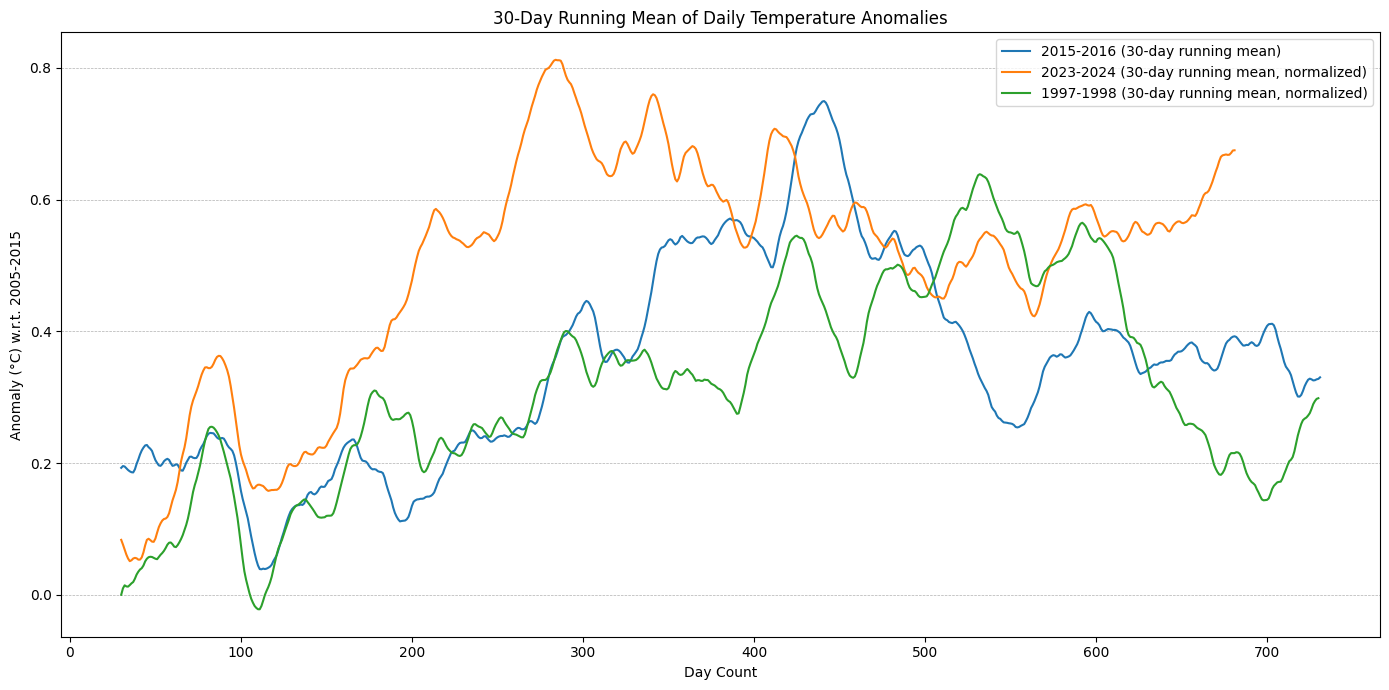

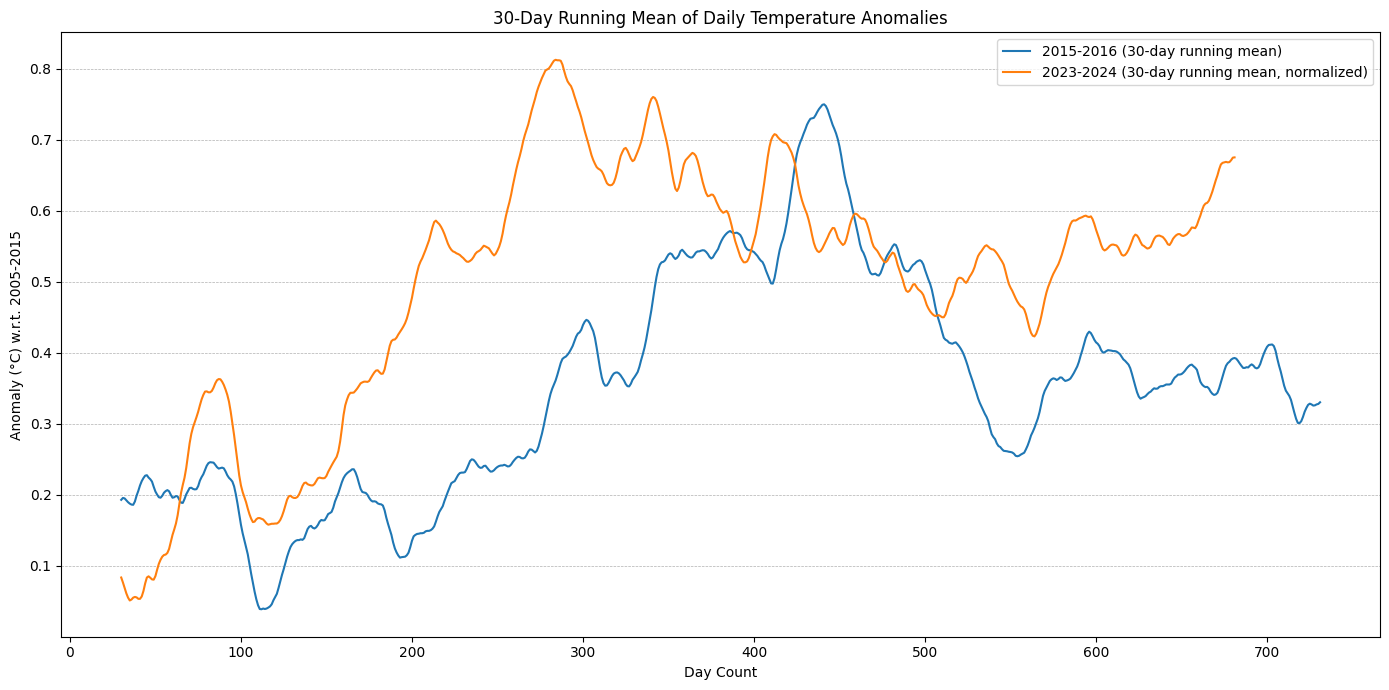

In [19]:
# Example usage:
file_path = 'era5_daily_91_20.csv'
data = load_data(file_path)

# 1997-1998 compared to 2005-2014
anomalies_1997_1998 = calculate_anomalies(data, years=[1997, 1998], baseline_years=range(2005, 2015), adjustment=-0.38)

# 2015-2016 compared to 2005-2014
anomalies_2015_2016 = calculate_anomalies(data, years=[2015, 2016], baseline_years=range(2005, 2015))

# 2023-2024 compared to 2013-2022, with normalization
anomalies_2023_2024 = calculate_anomalies(data, years=[2023, 2024], baseline_years=range(2005, 2015), adjustment=0.16)

# Plot the 30-day running mean
plot_running_mean(anomalies_2015_2016, anomalies_2023_2024, anomalies_1997_1998,
                  label_1='2015-2016 (30-day running mean)', 
                  label_2='2023-2024 (30-day running mean, normalized)',
                  label_3='1997-1998 (30-day running mean, normalized)')

plot_running_mean_2(anomalies_2015_2016, anomalies_2023_2024,
                  label_1='2015-2016 (30-day running mean)', 
                  label_2='2023-2024 (30-day running mean, normalized)')

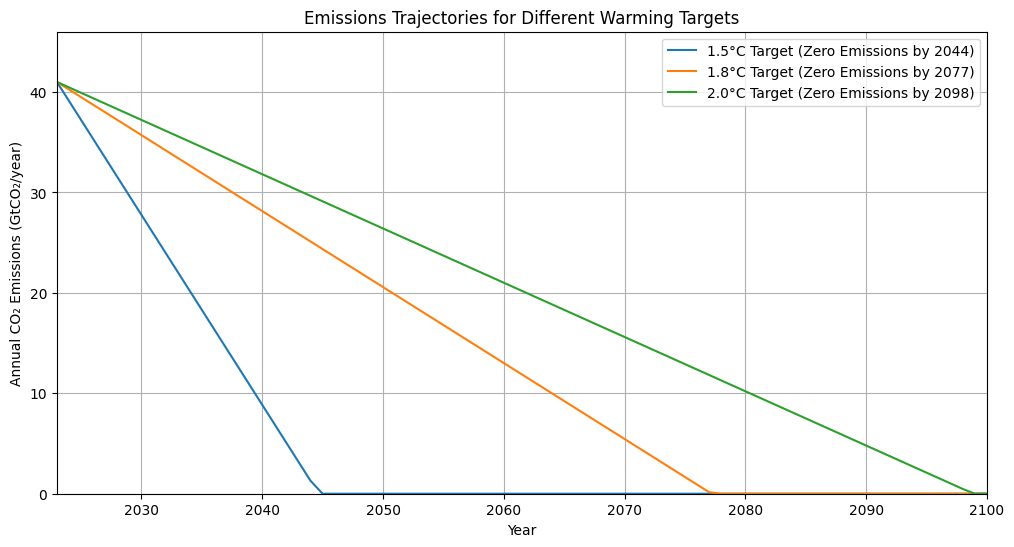

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
E0 = 41  # Current emissions in GtCO2/year
t0 = 2023  # Current year
tf = 2100  # Final year
current_temp = 1.3  # Current temperature increase in °C
carbon_sensitivity = 0.45  # °C per 1000 GtCO2

# Target temperatures
targets = [1.5, 1.8, 2.0]  # °C

# Initialize plot
plt.figure(figsize=(12, 6))

for target_temp in targets:
    delta_T = target_temp - current_temp  # Additional warming allowed
    Ce = (delta_T / carbon_sensitivity) * 1000  # Allowed cumulative emissions in GtCO2
    t1 = t0 + (2 * Ce) / E0  # Year when emissions reach zero
    t1 = min(t1, tf)  # Ensure t1 does not exceed tf

    # Time arrays
    years_decline = np.arange(t0, int(t1) + 1)
    years_zero = np.arange(int(t1) + 1, tf + 1)
    years = np.concatenate((years_decline, years_zero))

    # Emissions trajectory
    emissions_decline = E0 * (1 - (years_decline - t0) / (t1 - t0))
    emissions_zero = np.zeros_like(years_zero)
    emissions = np.concatenate((emissions_decline, emissions_zero))

    # Plotting
    plt.plot(years, emissions, label=f'{target_temp}°C Target (Zero Emissions by {int(t1)})')

# Customize plot
plt.title('Emissions Trajectories for Different Warming Targets')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ Emissions (GtCO₂/year)')
plt.legend()
plt.grid(True)
plt.xlim(t0, tf)
plt.ylim(0, E0 + 5)

# Show plot
plt.show()


In [70]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Function 1: Import data
def import_data(enso_path, temperature_path):
    enso_data = pd.read_csv(enso_path, delim_whitespace=True, skiprows=1, na_values="-99.99")
    enso_data.columns = ["Year", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    enso_data = enso_data.dropna()  # Remove rows with NaN values
    enso_data_long = pd.melt(enso_data, id_vars=["Year"], var_name="Month", value_name="Value")
    enso_data_long['Month'] = pd.to_datetime(enso_data_long['Month'], format='%b').dt.month
    enso_data_long['Year'] = enso_data_long['Year'].astype(int)
    
    temperature_data = pd.read_csv(temperature_path)
    temperature_data['date'] = pd.to_datetime(temperature_data['date'])
    temperature_data['Year'] = temperature_data['year']
    temperature_data['Month'] = temperature_data['date'].dt.month

    return enso_data_long, temperature_data

# Function 2: Detrend temperature data
def detrend_temperature(temperature_data, frac=0.2):
    # Apply lowess smoothing to calculate the trend
    lowess = sm.nonparametric.lowess
    lowess_fit = lowess(temperature_data['anomaly'].dropna(), 
                        temperature_data['date'].dropna(), 
                        frac=frac)
    
    # Interpolate the lowess fit back to the original data's dates
    temperature_data['Lowess_Fit'] = np.interp(temperature_data['date'].map(pd.Timestamp.timestamp), 
                                               pd.to_datetime(lowess_fit[:, 0]).map(pd.Timestamp.timestamp), 
                                               lowess_fit[:, 1])
    # Calculate detrended anomaly
    temperature_data['Detrended_Anomaly'] = temperature_data['anomaly'] - temperature_data['Lowess_Fit']
    
    # Plot the anomaly with LOWESS fit
    plt.figure(figsize=(14, 7))
    plt.plot(temperature_data['date'], temperature_data['anomaly'], label='Temperature Anomalies', alpha=0.5)
    plt.plot(temperature_data['date'], temperature_data['Lowess_Fit'], color='red', label='LOWESS Fit (Trend)')
    plt.xlabel('Date')
    plt.ylabel('Temperature Anomaly (°C)')
    plt.title('Temperature Anomalies with LOWESS Fit')
    plt.legend()
    plt.show()
    
    return temperature_data

# Function 3: Merge ENSO and detrended temperature data
def merge_data(enso_data, temperature_data):
    enso_data['Day'] = 1
    enso_data['Date'] = pd.to_datetime(enso_data[['Year', 'Month', 'Day']])
    merged_data = pd.merge(temperature_data[['date', 'Detrended_Anomaly']], 
                           enso_data[['Date', 'Value']], 
                           left_on='date', right_on='Date', 
                           how='outer').sort_values(by='date').reset_index(drop=True)
    merged_data = merged_data.rename(columns={'date': 'Date', 'Value': 'ENSO_Value'})
    merged_data['ENSO_Value'] = pd.to_numeric(merged_data['ENSO_Value'], errors='coerce')
    return merged_data


# Function 4: Plot detrended anomalies for ENSO events exceeding a threshold
# Adjust Function 4 to center the plot on the maximum ENSO value within each >2 event period
def plot_detrended_anomalies(merged_data, threshold=2, window=30, min_year=1940, enso_buffer = 12):
    # Filter for ENSO events above the threshold and after the minimum year
    enso_events = merged_data[(merged_data['ENSO_Value'] > threshold) & 
                              (merged_data['Date'] >= f'{min_year}-01-01')].dropna(subset=['Date']).reset_index()

    # Identify periods where the ENSO value first exceeds the threshold and find the maximum value in each period
    max_event_dates = []
    i = 0
    while i < len(enso_events):
        # Define a 9-month period starting from the first exceedance of threshold
        start_date = enso_events['Date'][i]
        end_date = start_date + pd.DateOffset(months=enso_buffer)
        event_period = enso_events[(enso_events['Date'] >= start_date) & (enso_events['Date'] <= end_date)]

        # Find the date with the highest ENSO value within this period
        max_value_date = event_period.loc[event_period['ENSO_Value'].idxmax(), 'Date']
        max_event_dates.append(max_value_date)

        # Move to the next period after this 9-month window
        i += len(event_period)
    
    # Calculate the 30-day running average of the detrended anomaly
    merged_data['Detrended_Anomaly_30day'] = merged_data['Detrended_Anomaly'].rolling(window=window, center=True, min_periods=1).mean()

    # Plot the 30-day running averages for 12 months before and after each max event date
    plt.figure(figsize=(14, 7))
    for i, event_date in enumerate(max_event_dates):
        start_date = event_date - pd.DateOffset(months=12)
        end_date = event_date + pd.DateOffset(months=13)
        event_subset = merged_data[(merged_data['Date'] >= start_date) & (merged_data['Date'] <= end_date)]
    
        # Calculate time delta in days and approximate months as 30 days for plotting
        event_subset['Months_From_Event'] = (event_subset['Date'] - event_date).dt.days / 30
    
        if i == len(max_event_dates) - 1:
            # This is the last event (assumed to be 2023), plot with different properties
            plt.plot(event_subset['Months_From_Event'], event_subset['Detrended_Anomaly_30day'],
                     label=f'Event Centered on {event_date.date()}', color='black', linewidth=3)
        else:
            # Plot other events normally
            plt.plot(event_subset['Months_From_Event'], event_subset['Detrended_Anomaly_30day'],
                     label=f'Event Centered on {event_date.date()}')

    plt.axvline(x=0, color='grey', linestyle='--')
    plt.xlabel('Months from ENSO Peak')
    plt.ylabel('Temperature Anomaly (°C)')
    plt.title('30-Day Running Average of Detrended Temperature Anomalies for >'+str(threshold)+'C ENSO 3.4 Events')
    plt.legend(loc='upper left')
    plt.show()


# Adjusted code to calculate and plot mean and standard deviation directly without exporting to CSV

def plot_mean_stdev_comparison(merged_data, threshold=2, window=30, min_year=1940, exclude_year=2023, enso_buffer = 12):
    # Identify peak dates for each ENSO event period where ENSO exceeds threshold
    enso_events = merged_data[(merged_data['ENSO_Value'] > threshold) & 
                              (merged_data['Date'] >= f'{min_year}-01-01')].dropna(subset=['Date']).reset_index()
    max_event_dates = []
    i = 0
    while i < len(enso_events):
        start_date = enso_events['Date'][i]
        end_date = start_date + pd.DateOffset(months=enso_buffer)
        event_period = enso_events[(enso_events['Date'] >= start_date) & (enso_events['Date'] <= end_date)]
        max_value_date = event_period.loc[event_period['ENSO_Value'].idxmax(), 'Date']
        max_event_dates.append(max_value_date)
        i += len(event_period)

    # Separate events into those before the exclusion year and the exclusion year itself
    pre_exclusion_dates = [date for date in max_event_dates if date.year < exclude_year]
    exclusion_date = next((date for date in max_event_dates if date.year == exclude_year), None)

    # Calculate the 30-day running average of the detrended anomaly
    merged_data['Detrended_Anomaly_30day'] = merged_data['Detrended_Anomaly'].rolling(window=window, center=True, min_periods=1).mean()

    # Collect detrended anomalies for each event period centered on the peak event date
    event_anomalies = []

    # Process events excluding the exclusion year
    for event_date in pre_exclusion_dates:
        start_date = event_date - pd.Timedelta(days=366)
        end_date = event_date + pd.Timedelta(days=396)
        event_subset = merged_data[(merged_data['Date'] >= start_date) & (merged_data['Date'] <= end_date)].copy()
        
        # Calculate days from event
        event_subset['Days_From_Event'] = (event_subset['Date'] - event_date).dt.days
        
        # Align data for full range from -366 to +366 days
        aligned_data = event_subset.set_index('Days_From_Event')['Detrended_Anomaly_30day'].reindex(range(-366, 397))
        event_anomalies.append(aligned_data.fillna(np.nan).astype(float))  # Fill missing data with NaN for calculation

    # Calculate mean and standard deviation across events excluding the exclusion year
    event_anomalies_df = pd.concat(event_anomalies, axis=1)
    mean_anomalies = event_anomalies_df.mean(axis=1).fillna(0).astype(float)  # Ensure float64
    std_anomalies = event_anomalies_df.std(axis=1).fillna(0).astype(float)    # Ensure float64

    # Use index to set x_vals before converting to numpy arrays
    x_vals = mean_anomalies.index.to_numpy(dtype=np.float64) / 30  # Convert days to months
    mean_anomalies = mean_anomalies.to_numpy(dtype=np.float64)
    std_anomalies = std_anomalies.to_numpy(dtype=np.float64)

    # Plot mean and standard deviation shading with `fill_between`
    plt.figure(figsize=(14, 7))
    plt.plot(x_vals, mean_anomalies, label="Mean El Nino Event (Excluding 2023)", color="blue")
    plt.fill_between(x_vals, mean_anomalies - std_anomalies*2, mean_anomalies + std_anomalies*2, color="blue", alpha=0.2, label="±2 Std Dev")

    # Plot the exclusion year (2023) event if available
    if exclusion_date:
        start_date_exclusion = exclusion_date - pd.Timedelta(days=366)
        end_date_exclusion = exclusion_date + pd.Timedelta(days=396)
        exclusion_subset = merged_data[(merged_data['Date'] >= start_date_exclusion) & (merged_data['Date'] <= end_date_exclusion)].copy()
        exclusion_subset['Months_From_Event'] = (exclusion_subset['Date'] - exclusion_date).dt.days / 30
        plt.plot(exclusion_subset['Months_From_Event'], exclusion_subset['Detrended_Anomaly_30day'], label="2023 Event", color='black', linewidth=3)

    # Final plot formatting
    plt.axvline(x=0, color='grey', linestyle='--', label='')
    plt.xlabel('Months from ENSO Peak')
    plt.ylabel('Temperature Anomaly (°C)')
    plt.title('30-Day Running Average of Detrended Temperature Anomalies for >'+str(threshold)+'C ENSO 3.4 Events')
    plt.legend(loc='upper left')
    plt.show()



/var/folders/z6/dy3ql7wn76bg_6dpnpyylk0r0000gn/T/ipykernel_4938/2558837752.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  enso_data = pd.read_csv(enso_path, delim_whitespace=True, skiprows=1, na_values="-99.99")


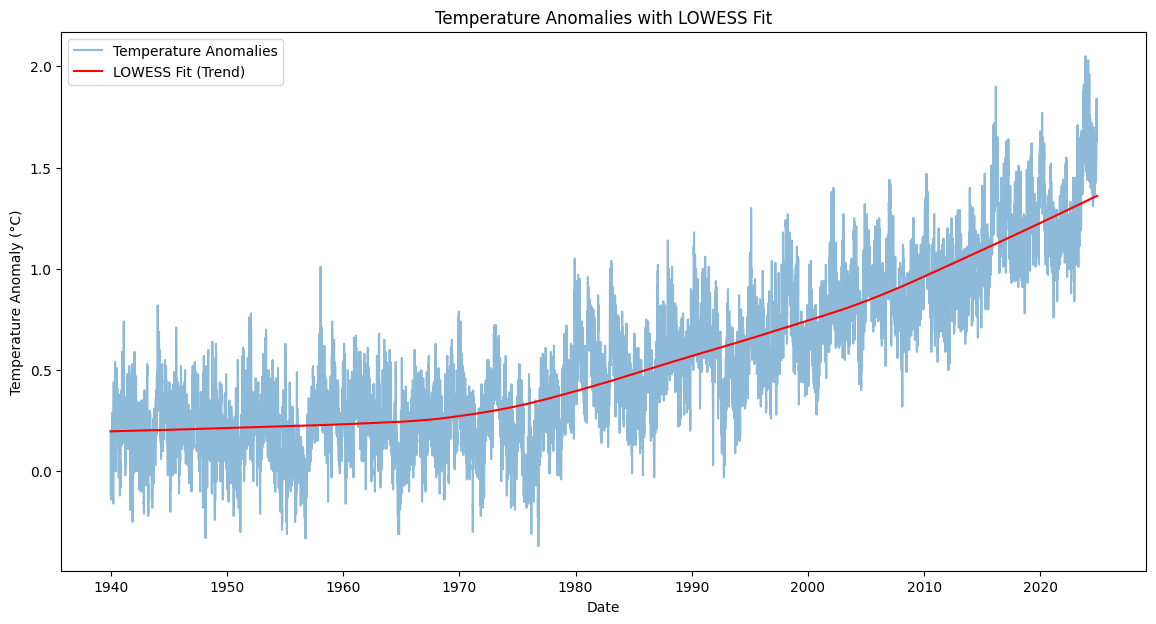

/var/folders/z6/dy3ql7wn76bg_6dpnpyylk0r0000gn/T/ipykernel_4938/2558837752.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_subset['Months_From_Event'] = (event_subset['Date'] - event_date).dt.days / 30
/var/folders/z6/dy3ql7wn76bg_6dpnpyylk0r0000gn/T/ipykernel_4938/2558837752.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_subset['Months_From_Event'] = (event_subset['Date'] - event_date).dt.days / 30
/var/folders/z6/dy3ql7wn76bg_6dpnpyylk0r0000gn/T/ipykernel_4938/2558837752.py:96: Sett

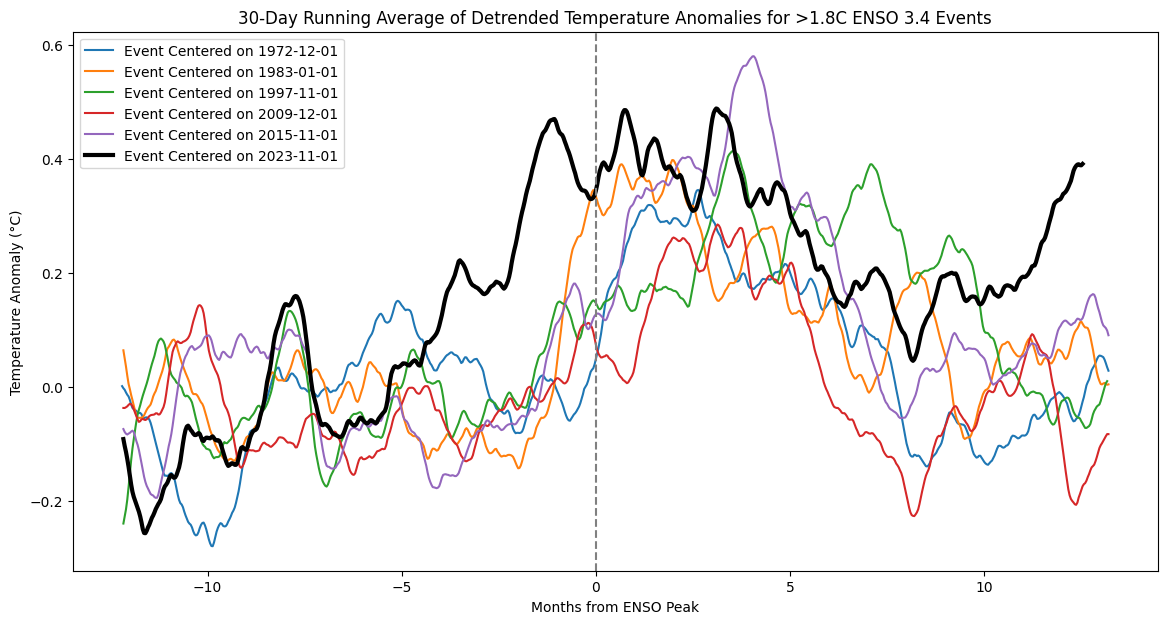

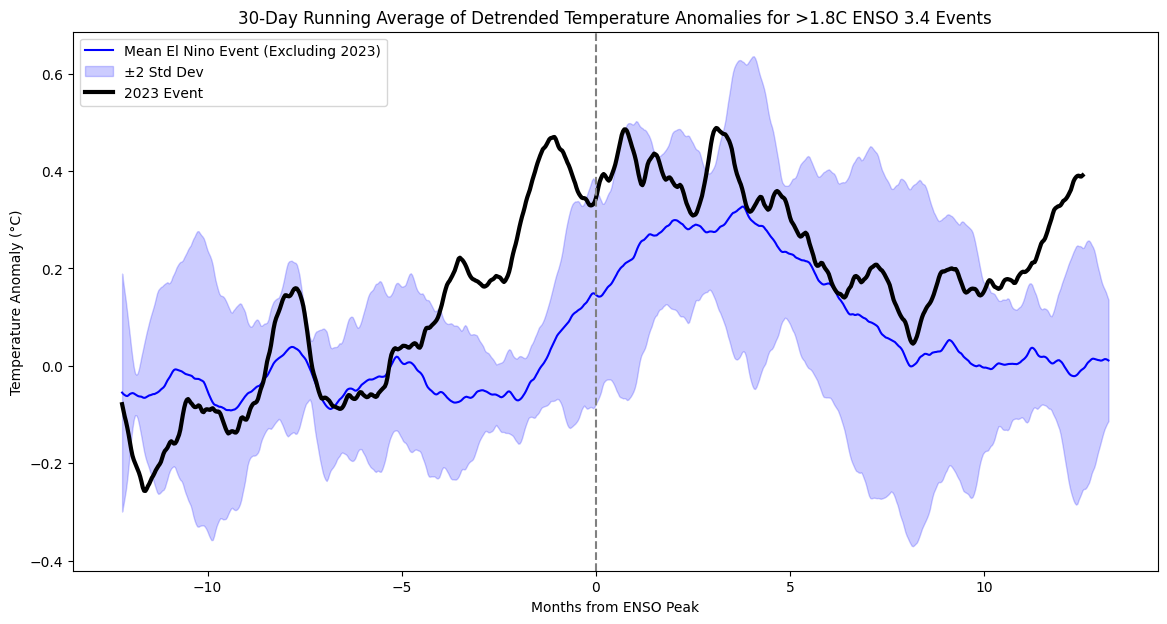

In [71]:
# Run the complete workflow
enso_path = 'nino34.long.anom.data.txt'
temperature_path = 'era5_daily_preindustrial.csv'

enso_data, temperature_data = import_data(enso_path, temperature_path)
temperature_data_detrended = detrend_temperature(temperature_data, frac=0.4)
merged_data = merge_data(enso_data, temperature_data_detrended)
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]

# Re-run the plot function to verify that it works correctly
plot_detrended_anomalies(merged_data, threshold=1.8)
plot_mean_stdev_comparison(merged_data, threshold=1.8)